<a href="https://colab.research.google.com/github/joseemaro/bdm_EvaluatingGoogleApps/blob/main/tpfinal_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SE IMPORTAN LAS LIBRERIAS Y LOS DATASETS.

In [ ]:
!wget https://raw.githubusercontent.com/joseemaro/bdm_datasets/main/googleplaystore.csv

!wget https://raw.githubusercontent.com/joseemaro/bdm_datasets/main/googleplaystore_user_reviews.csv

import numpy as np # algebra linear
import pandas as pd # procesamiento de datos, CSV file 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches
%matplotlib inline
plt.style.use('seaborn-white')
from sklearn import metrics

## SE LEE EL DATASET CON LOS DATOS DE LAS APLICACIONES

In [2]:
# Lee el archivo
data = pd.read_csv("googleplaystore.csv", encoding = "utf-8") 

# PREPROCESAMIENTO DE LOS DATOS

In [3]:
#se verifica si hay nan de los registros
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Se observa que el campo rating tiene una gran cantidad de faltantes, mientras que los campos type,content rating, current ver, y android ver tienen pocos faltantes.

In [4]:
#se remplaza los nan de rating por la media debido a que son muchos registros
data['Rating'].fillna((data['Rating'].mean()), inplace=True)

data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [5]:
#el resto de los registros con nan al ser una cantidad minima se borran
df1 = data.dropna()

df1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [6]:
#SE VERIFICA SI HAY REGISTROS DUPLICADOS
df1[df1.duplicated(['App'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [8]:
#se eliminan los duplicados basandose en el nombre de la app
df2 = df1.drop_duplicates(keep='last',subset=['App'])

In [9]:
#campo installs
#se limpian los caracteres para pasar el campo a entero
df2.Installs = df2.Installs.str.replace('+' , '')
df2.Installs = df2.Installs.str.replace(',' , '')

In [10]:
#se convierte el campo  installs a int
df2.Installs = df2.Installs.astype('float').astype('int')
df2['Installs'].unique()

array([     10000,    5000000,   50000000,     100000,      50000,
          1000000,   10000000,     500000,       5000, 1000000000,
        100000000,       1000,         50,        100,        500,
               10,          1,          5,  500000000,          0])

In [11]:
#se convierte el campo price a float
df2['Price'] = df2['Price'].apply(lambda x: float(x.replace("$","")))
df2['Price'].unique()

array([  0.  ,   4.99,   3.99,   1.49,   2.99,   7.99,   3.49,   1.99,
         5.99,   6.99,   9.99,   7.49,   0.99,   1.  ,   2.49,  10.99,
         1.5 ,  14.99,  15.99,  79.99,   9.  ,  10.  ,  16.99,  11.99,
        29.99,  74.99,   5.49,  33.99,  24.99,  39.99,  19.99,   4.49,
         1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,  17.99, 400.  ,
         3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,
         1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,  18.99, 389.99,
        19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99, 109.99,   3.95,
       154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,   4.59,
        15.46,   3.04,  12.99,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [12]:
#se convierte el conteo de reviews a int
df2['Reviews']= df2['Reviews'].apply(lambda x: int(x))
df2['Reviews'].unique()

array([   159,  87510, 215644, ...,    603,   1195, 398307])

In [13]:
#vamos a remplazar el varies with device del campo size por nan
df2['Size'].replace('Varies with device',np.nan,inplace=True)
#se convierte size a float
df2['Size']=df2['Size'].str.replace('M','e+6').str.replace('k','e+3').str.replace('Varies with device','0').astype('float')
df2['Size'].unique()

array([1.90e+07, 8.70e+06, 2.50e+07, 2.80e+06, 5.60e+06, 2.90e+07,
       3.30e+07, 3.10e+06, 2.80e+07, 1.20e+07, 2.00e+07, 2.10e+07,
       3.70e+07, 5.50e+06, 1.70e+07, 3.90e+07, 3.10e+07, 1.40e+07,
       4.20e+06, 2.30e+07, 6.00e+06, 6.10e+06, 4.60e+06, 9.20e+06,
       5.20e+06, 1.10e+07,      nan, 9.40e+06, 1.50e+07, 1.00e+07,
       1.20e+06, 2.40e+07, 2.60e+07, 8.00e+06, 7.90e+06, 5.60e+07,
       5.70e+07, 3.50e+07, 5.40e+07, 2.01e+05, 3.60e+06, 5.70e+06,
       8.60e+06, 2.40e+06, 2.70e+07, 2.70e+06, 2.50e+06, 7.00e+06,
       1.60e+07, 3.40e+06, 8.90e+06, 3.90e+06, 2.90e+06, 3.80e+07,
       3.20e+07, 5.40e+06, 1.80e+07, 1.10e+06, 2.20e+06, 4.50e+06,
       9.80e+06, 5.20e+07, 9.00e+06, 6.70e+06, 3.00e+07, 2.60e+06,
       7.10e+06, 3.70e+06, 2.20e+07, 7.40e+06, 6.40e+06, 3.20e+06,
       8.20e+06, 9.90e+06, 4.90e+06, 9.50e+06, 5.00e+06, 5.90e+06,
       1.30e+07, 7.30e+07, 6.80e+06, 3.50e+06, 4.00e+06, 2.30e+06,
       7.20e+06, 2.10e+06, 4.20e+07, 7.30e+06, 9.10e+06, 5.50e

# VISUALIZACION DE DATOS


Text(0, 0.5, 'Cantidad')

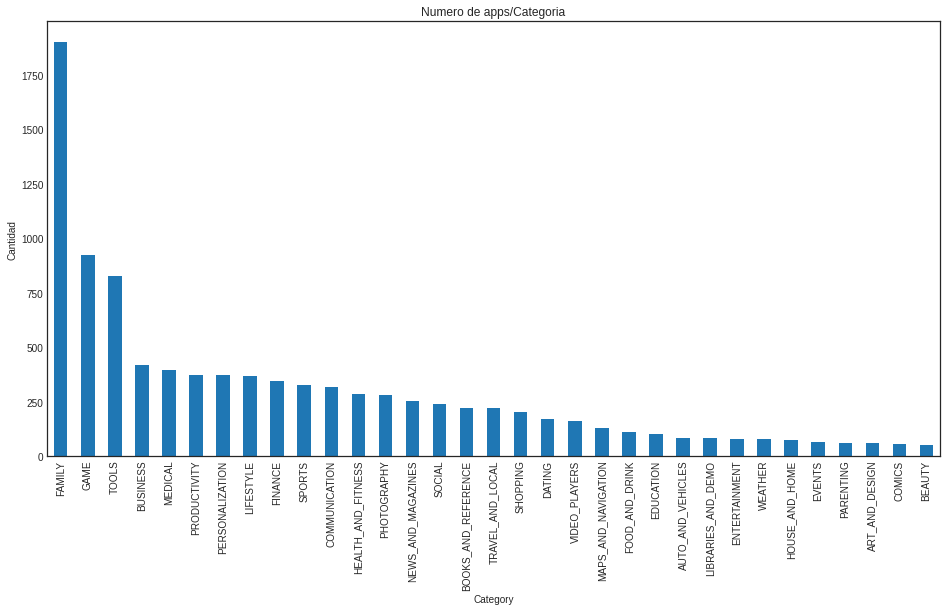

In [14]:
#Numero de aplicaciones por categoria

fig = plt.figure(figsize=(16,8)) 
df2.groupby('Category').count()["App"].sort_values(ascending=False).plot(kind='bar',title='Numero de apps/Categoria', fontsize=10)
plt.ylabel('Cantidad') 

In [15]:
#apps con 1 billon de descargas

dfa = df2.groupby(['Category' ,'App'])['Installs'].sum().reset_index()

dfa = dfa.sort_values('Installs', ascending = False)

dftop = dfa[dfa.Installs == 1000000000 ]


dftop.style.set_properties(**{'background-color': 'pink',
                            'color': 'black',
                            'border-color': 'black'})

,Category,App,Installs
337,BOOKS_AND_REFERENCE,Google Play Books,1000000000
6377,NEWS_AND_MAGAZINES,Google News,1000000000
8827,TOOLS,Google,1000000000
4765,GAME,Subway Surfers,1000000000
1059,COMMUNICATION,Hangouts,1000000000
7414,PRODUCTIVITY,Google Drive,1000000000
1053,COMMUNICATION,Google Chrome: Fast & Secure,1000000000
9331,TRAVEL_AND_LOCAL,Maps - Navigate & Explore,1000000000
1176,COMMUNICATION,WhatsApp Messenger,1000000000
2645,FAMILY,Google Play Games,1000000000


La lista de apps que tienen mas de 1 billon de descargas muestra a las siguientes aplicaciones:
Google ,Google Drive, Google Chrome Fast Secure , Google+ ,Google Photos ,Google Play Games ,Google Play Books ,Google News ,Hangouts

Google ,Google Drive, Google Chrome Fast Secure , Google+ ,Google Photos ,Google Play Games ,Google Play Books ,Google News ,Hangouts

Gmail ,Google Street View ,Google Play Movies & TV ,Maps - Navigate & Explore , YouTube (Apps pertenecientes a Google)

Facebook ,WhatsApp Messenger , Instagram ,Messenger – Text and Video Chat for Free (Apps pertenecientes a Facebook)

Skype - free IM & video calls (pertenece a Microsoft)

Subway Surfers (pertenece a SYBO GAMES)

La razon por la que las aplicaciones de google tienen mas descargas que el resto es porque vienen preinstaladas en todos los sistemas android.


Text(0.5, 0, 'Categoria')

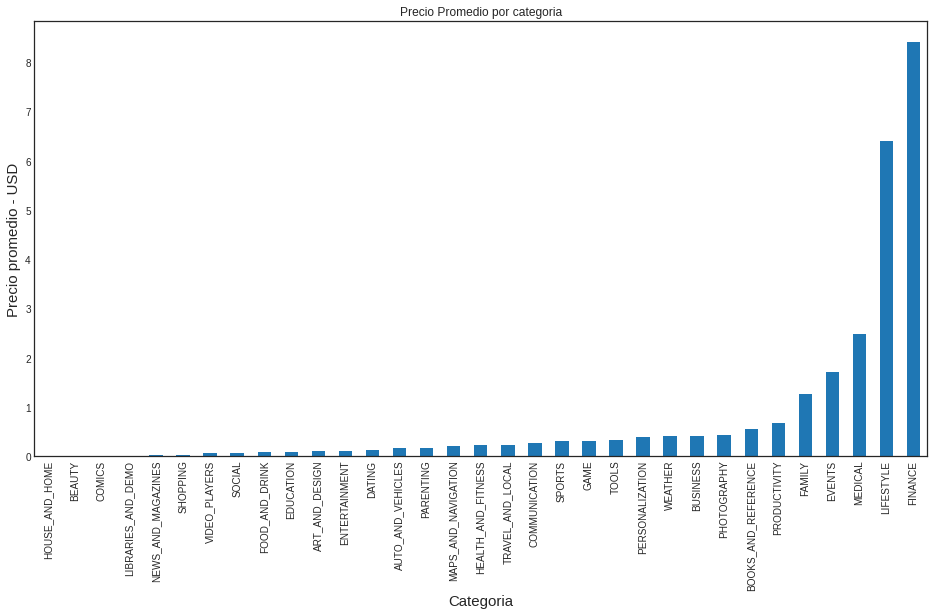

In [16]:
#Precio promedio de las apps en cada categoria
fig = plt.figure(figsize=(16,8)) 
df2.groupby('Category').mean().sort_values(by='Price',ascending='True')['Price'].plot(kind='bar',title='Precio Promedio por categoria', fontsize=10)
plt.ylabel('Precio promedio - USD', fontsize=15) 
plt.xlabel('Categoria',  fontsize=15)

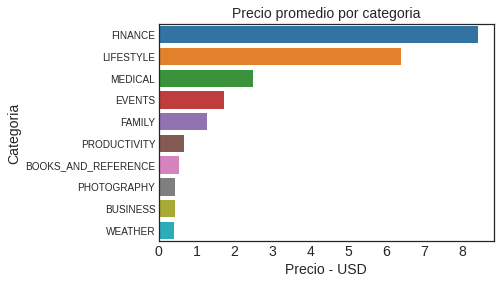

In [17]:
#Precio promedio de las apps en cada categoria 2
prom_price_cat = df2.groupby('Category')[['Price']].mean().sort_values('Price', ascending=False).head(10)

sns.barplot( prom_price_cat.Price, prom_price_cat.index)

plt.title('Precio promedio por categoria', fontsize=14)
plt.xticks(rotation=0, fontsize=14);
plt.ylabel('Categoria', fontsize=14);
plt.xlabel('Precio - USD', fontsize=14);

In [18]:
#Tamaño promedio de las aplicaciones
print("Mean size " + str(df2["Size"].mean()/(1024*1024)) + " Mb") #converting in MB
print("Heaviest app size " + str(df2["Size"].max()/(1024*1024)) + " Mb") #converting in MB
print("Smalles app size " + str(df2["Size"].min()/(1024*1024)) + " Mb") #converting in MB

Mean size 19.47081493838783 Mb
Heaviest app size 95.367431640625 Mb
Smalles app size 0.008106231689453125 Mb


Text(0, 0.5, 'Numero de descargas')

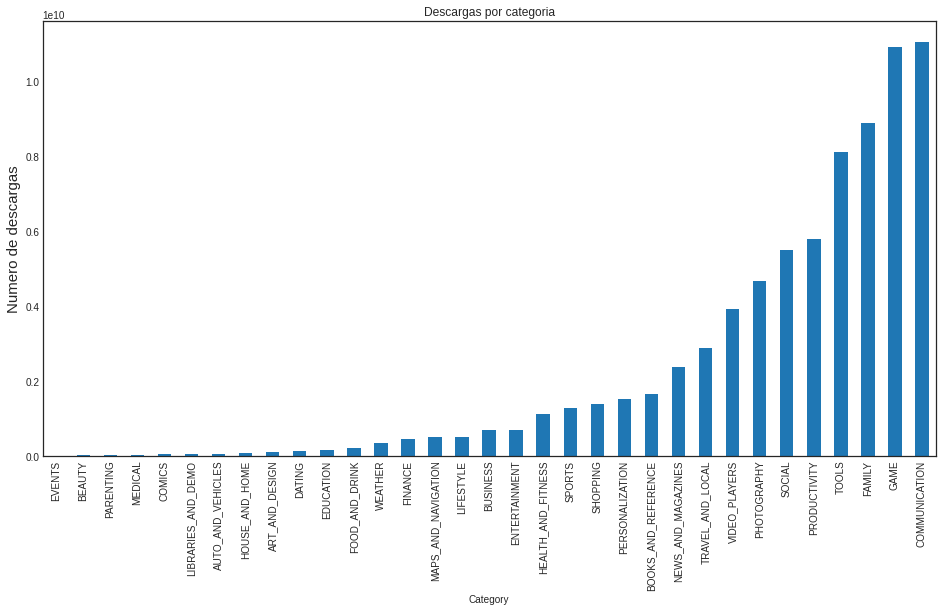

In [19]:
#Numero de descargas por categoria
fig = plt.figure(figsize=(16,8)) 
df2.groupby('Category').sum().sort_values(by='Installs',ascending='False')['Installs'].plot(kind='bar',title='Descargas por categoria', fontsize=10)
plt.ylabel('Numero de descargas', fontsize=15) 

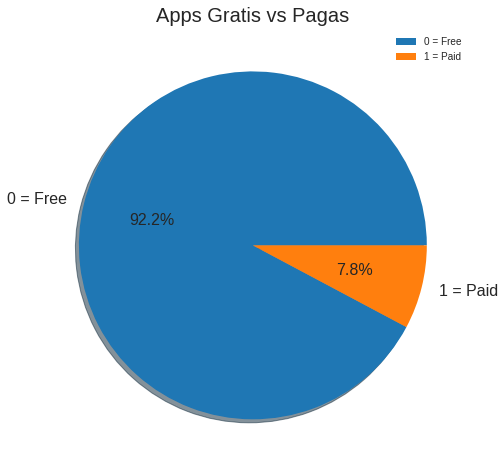

In [20]:
#Porcentaje de apps pagas y gratis

df3= df2.copy()
def is_free(price):
    if price > 0:
        return 1
    else:
        return 0
df3["is_free"] = df3["Price"].apply(lambda x: int(is_free(x))) 
fig = plt.figure(figsize=(16,8)) 
labels = ['0 = Free','1 = Paid']
sizes = df3['is_free'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True,textprops={'fontsize': 16})
plt.title('Apps Gratis vs Pagas',size = 20)
plt.legend()
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
No handles with labels found to put in legend.


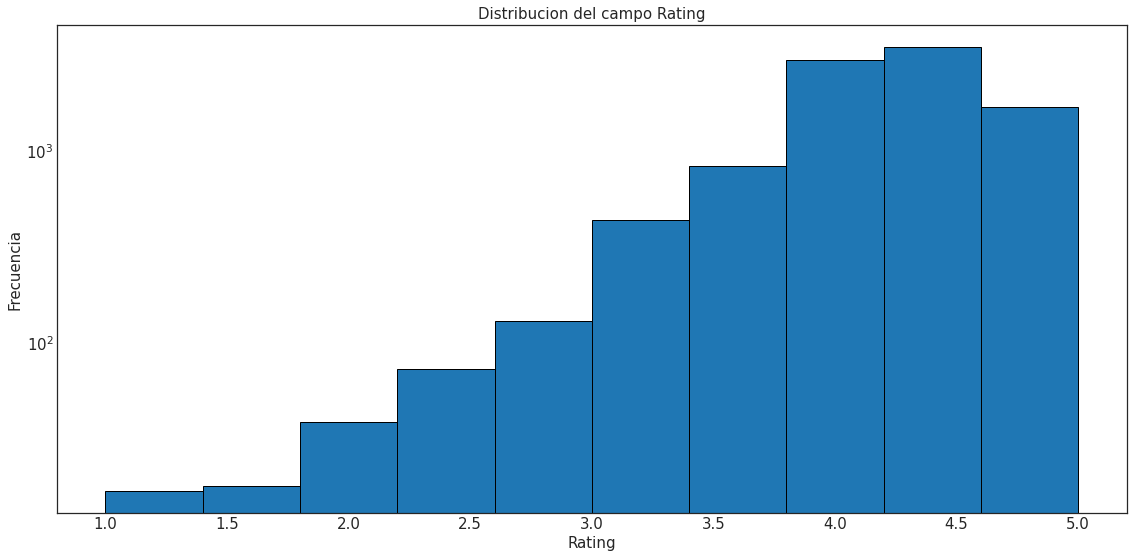

In [21]:
#vamos a observar la distribucion de la variable rating con un histograma
fig = plt.figure(figsize=(16,8)) 
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)
plt.hist(df2['Rating'],edgecolor = 'black', log=True)
plt.title("Distribucion del campo Rating", fontsize=15)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.tight_layout()
plt.legend()

No handles with labels found to put in legend.


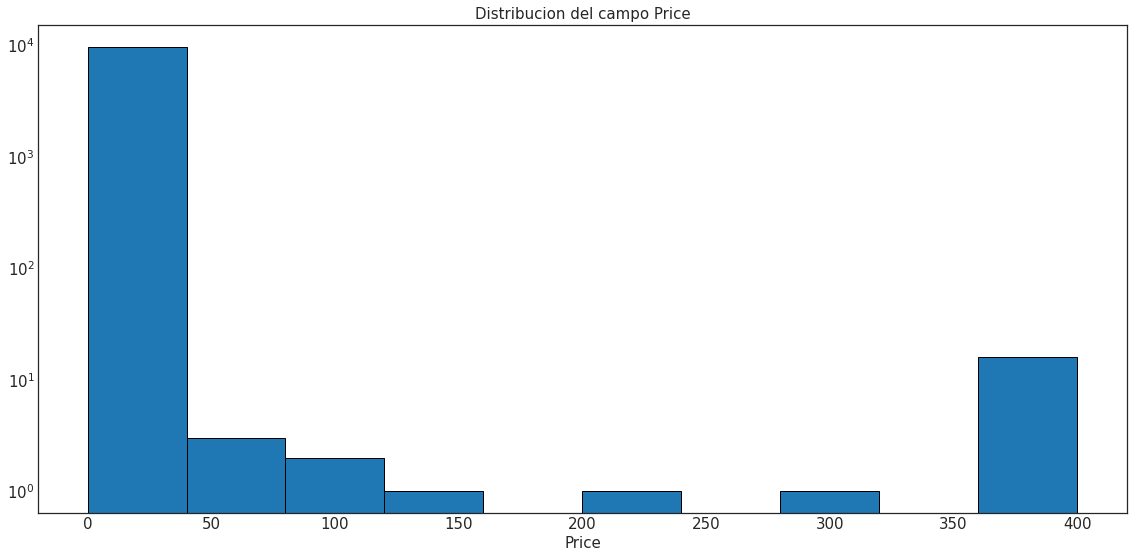

In [22]:
#tambien vamos a observar la distribucion de los precios
fig = plt.figure(figsize=(16,8)) 
plt.hist(df2['Price'],edgecolor = 'black', log=True)
plt.title("Distribucion del campo Price",  fontsize=15)
plt.xlabel('Price',  fontsize=15)
plt.tight_layout()
plt.legend()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


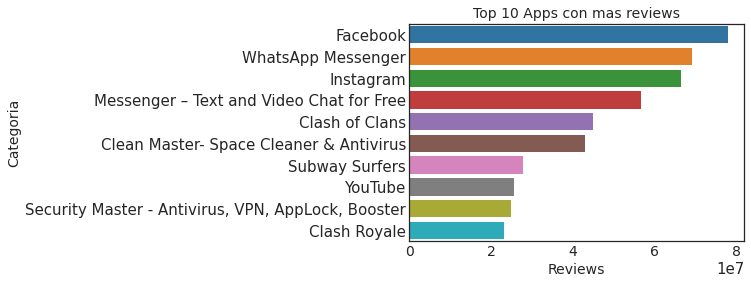

In [23]:
#mayor cantidad de reviews
most_no_of_reviews = df2.groupby('App')[['Reviews']].mean().sort_values('Reviews', ascending=False).head(10)

sns.barplot( most_no_of_reviews.Reviews, most_no_of_reviews.index)

plt.title('Top 10 Apps con mas reviews', fontsize=14)
plt.xticks(rotation=0, fontsize=14);
plt.ylabel('Categoria', fontsize=14);
plt.xlabel('Reviews', fontsize=14);

# Feature engineering - vamos a crear una columna que asocia descargas y precio



findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
No handles with labels found to put in legend.


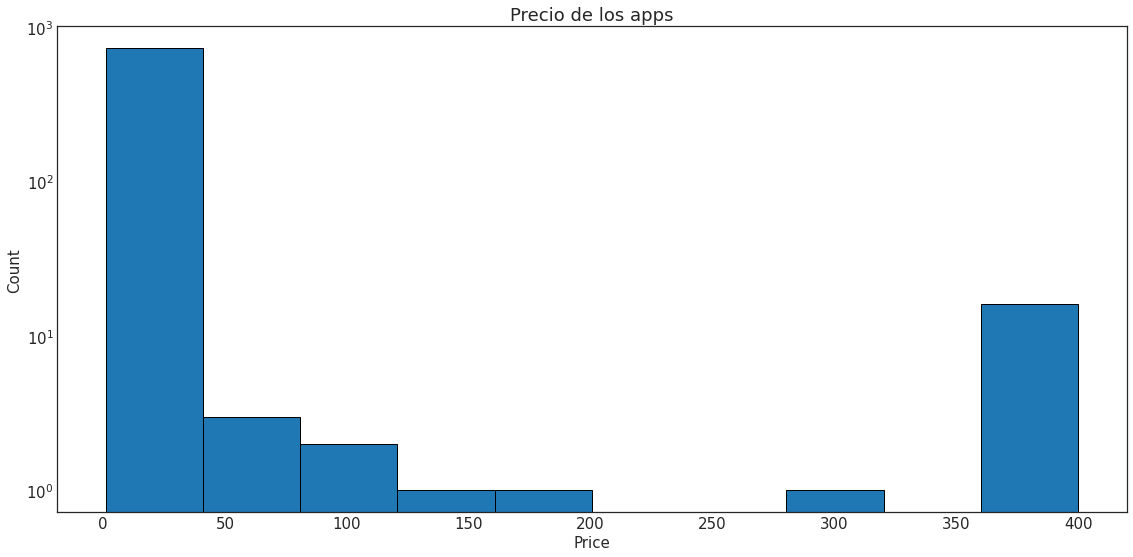

In [24]:

df_paid_apps = df2[df2['Price']>0]
df_paid_apps["Ganancia"] = df_paid_apps["Installs"] * df_paid_apps["Price"]
#histograma de las aplicaciones una vez eliminadas las gratis
fig = plt.figure(figsize=(16,8)) 
plt.hist(df_paid_apps['Price'],edgecolor = 'black', log=True)
median_age = df_paid_apps['Price'].median()
plt.title("Precio de los apps")
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()
plt.legend()

In [25]:
#apps paga con mas ganancia
df_paid_apps.sort_values(by=['Ganancia'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Ganancia
6692,cronometra-br,PRODUCTIVITY,4.193338,0,5400000.0,0,Paid,154.99,Everyone,Productivity,"November 24, 2017",1.0.0,4.1 and up,0.0
5945,Ain Arabic Kids Alif Ba ta,FAMILY,4.193338,0,33000000.0,0,Paid,2.99,Everyone,Education,"April 15, 2016",1.0,3.0 and up,0.0
5486,AP Series Solution Pro,FAMILY,4.193338,0,7400000.0,0,Paid,1.99,Everyone,Education,"July 30, 2017",1.3,4.0 and up,0.0
9719,EP Cook Book,MEDICAL,4.193338,0,3200000.0,0,Paid,200.00,Everyone,Medical,"July 26, 2015",1.0,3.0 and up,0.0
9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,4.193338,0,56000000.0,0,Paid,3.99,Everyone,Travel & Local,"January 22, 2017",1.1.1,4.1 and up,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,Grand Theft Auto: San Andreas,GAME,4.400000,348962,26000000.0,1000000,Paid,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,6990000.0
4034,Hitman Sniper,GAME,4.600000,408292,29000000.0,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,9900000.0
5356,I Am Rich Premium,FINANCE,4.100000,1867,4700000.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,19999500.0
5351,I am rich,LIFESTYLE,3.800000,3547,1800000.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,39999000.0


la app paga con mayor ganancia es minecraft con 69900000.0 usd.

Text(0, 0.5, 'Ganancia de descargas')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


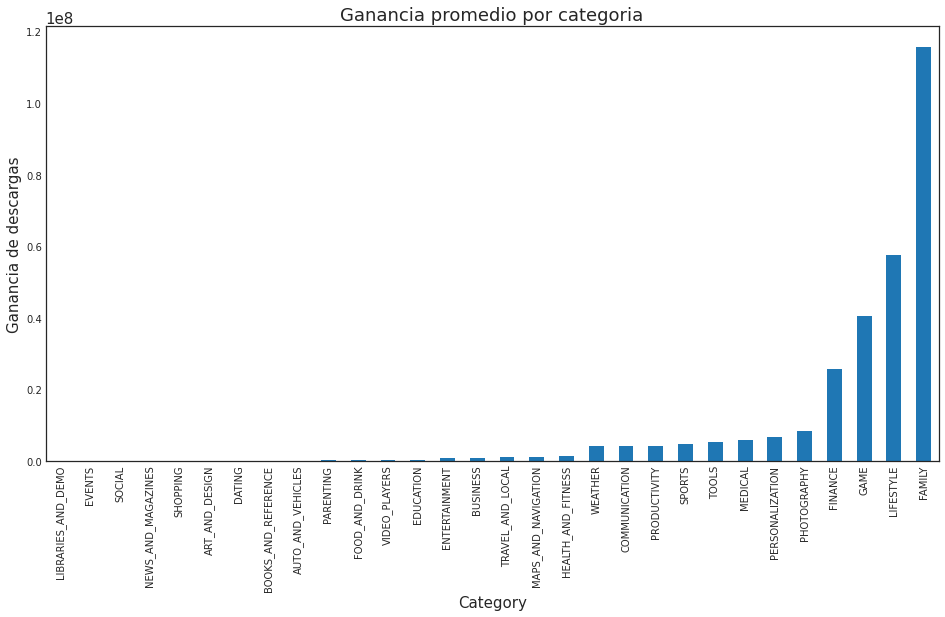

In [26]:
#ganancia por categoria
fig = plt.figure(figsize=(16,8)) 
df_paid_apps.groupby('Category').sum().sort_values(by='Ganancia',ascending='False')['Ganancia'].plot(kind='bar',title='Ganancia promedio por categoria', fontsize=10)
plt.ylabel('Ganancia de descargas', fontsize=15)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


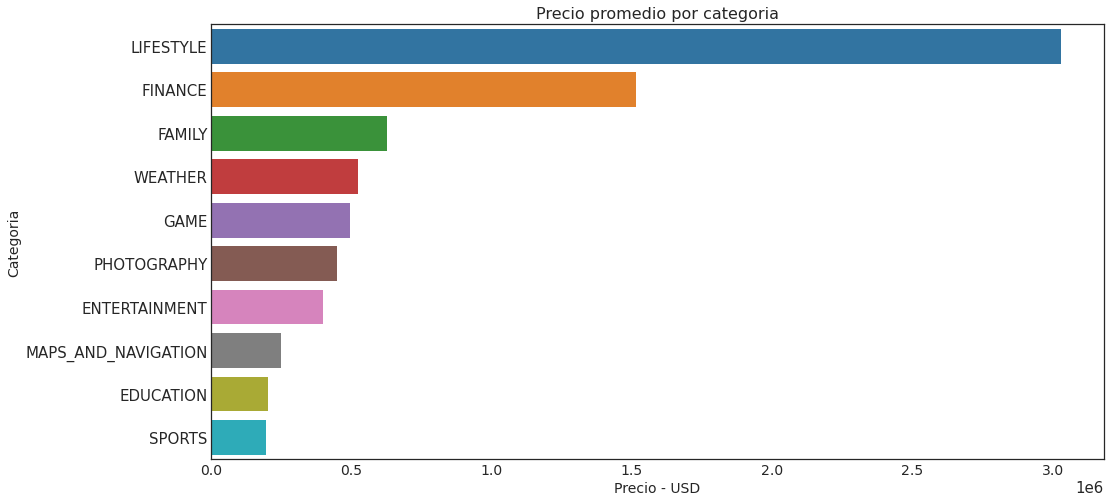

In [27]:
#ganancia por categoria 2
fig = plt.figure(figsize=(16,8))
ganancia_cat = df_paid_apps.groupby('Category')[['Ganancia']].mean().sort_values('Ganancia', ascending=False).head(10)

sns.barplot( ganancia_cat.Ganancia, ganancia_cat.index)

plt.title('Precio promedio por categoria', fontsize=16)
plt.xticks(rotation=0, fontsize=14);
plt.ylabel('Categoria', fontsize=14);
plt.xlabel('Precio - USD', fontsize=14);

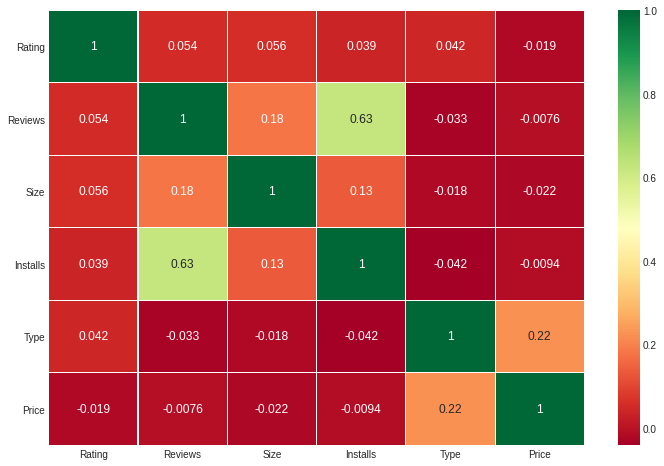

In [ ]:
#Grafico de correlacion entre los features del dataset
df3 = df2
df3["Type"] = df3["Type"].map({"Free": 0, "Paid":1})
sns.heatmap(df3.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':12})
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Se observa que el numero de descargas tiene una alta correlacion de 0,64 con el numero de reviews lo cual era predecible. 
El tipo(gratis o paga) esta  relacionado positivamente con el precio de forma que cuando el tipo se convierte en 1(pago) el precio aumenta.


# Machine learning modeling


## #Predecir el rating de una aplicacion usando regresion linear

In [ ]:
#funciones 
def print_metrics(y, y_predict):
    print('MSE: '+ str(metrics.mean_squared_error(y,y_predict)))
    print('MAE: '+ str(metrics.mean_absolute_error(y,y_predict)))
    print ('MSLE: '+ str(metrics.mean_squared_log_error(y,y_predict)))

def reg_plotting(y, y_predict, title):
    plt.figure(figsize=(12,8))
    sns.regplot(y_predict ,y,color='red')
    plt.legend()
    plt.title(title)
    plt.xlabel('Predicted Ratings')
    plt.ylabel('Ratings')
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=df2[["Reviews","Price"]]
y=df2.Rating

X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42)

# se pasan los features a la misma escala
scaler=StandardScaler()
X= scaler.fit_transform(X)

from sklearn.linear_model import LinearRegression
lin_r= LinearRegression()
model= lin_r.fit(X_train,y_train)

rating= model.predict(np.array([[1000,3]]))
print("Predicted rating is:",rating)

Predicted rating is: [4.16738455]


In [ ]:
y=model.intercept_ +(1000*model.coef_[0]+2*model.coef_[1])
print("Rating is:",y)

Rating is: 4.168012452372769


In [ ]:
pred= model.predict(X_test)
pred

array([4.16925362, 4.16929188, 4.16925104, ..., 4.17373128, 4.16925394,
       4.16925037])

In [ ]:
#test
from sklearn.metrics import mean_squared_error
print_metrics(y_test, pred)

MSE: 0.23787500493119831
MAE: 0.3293894837717997
MSLE: 0.011338780869685464


No handles with labels found to put in legend.


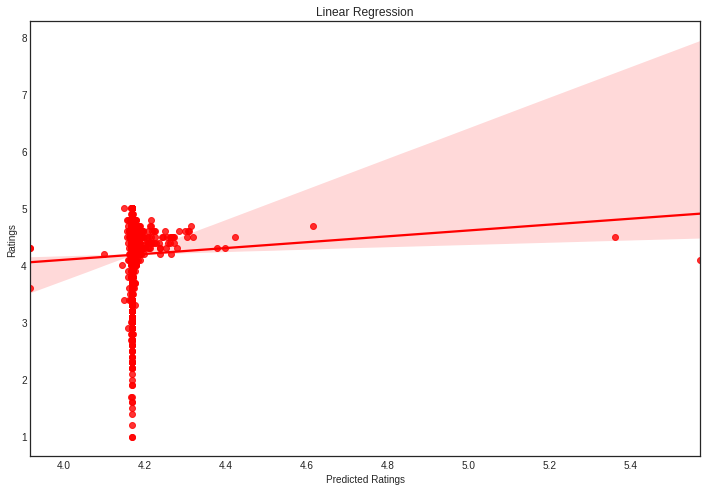

In [ ]:
#test
reg_plotting(y_test, pred, 'Linear Regression')

### Modelado con SVR

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
svr_predict = svr.predict(X_test)

In [ ]:
svr_predict

array([4.20021102, 4.20184999, 4.20010021, ..., 4.3493323 , 4.20022487,
       4.20007173])

In [ ]:
#test
print_metrics(y_test, svr_predict)

MSE: 0.23291639139573903
MAE: 0.31175351722084654
MSLE: 0.01124414135190453


No handles with labels found to put in legend.


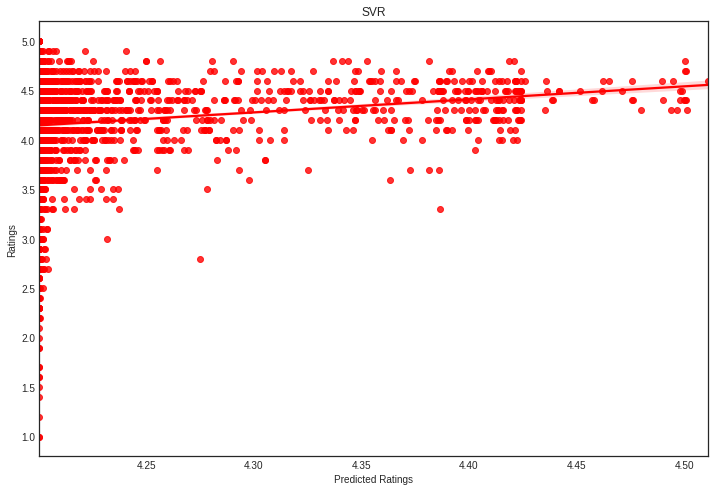

In [ ]:
#test
reg_plotting(y_test, svr_predict, 'SVR')

### Modelado con Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rand_forest = RandomForestRegressor(n_jobs=-1)
rand_forest.fit(X_train, y_train)
rand_forest_predict = rand_forest.predict(X_test)

In [ ]:
#test
print_metrics(y_test, rand_forest_predict)

MSE: 0.2738801977080416
MAE: 0.3609321565013424
MSLE: 0.012726982884617518


No handles with labels found to put in legend.


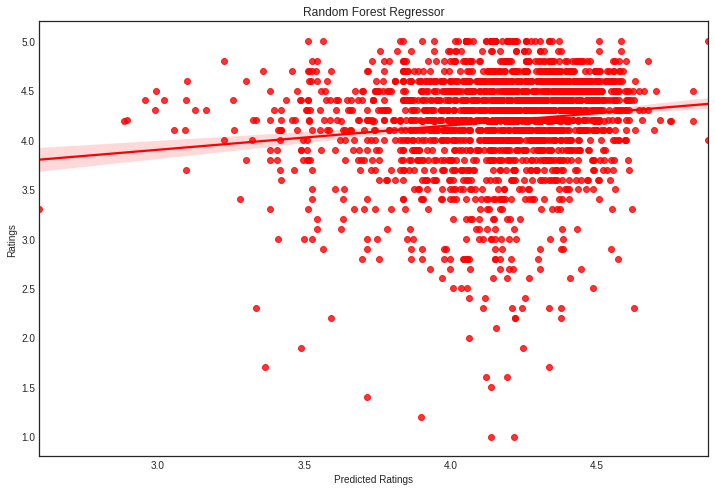

In [ ]:
#test
reg_plotting(y_test, rand_forest_predict, 'Random Forest Regressor')

voting regressor

In [ ]:
from sklearn.ensemble import VotingRegressor
voting_reg = VotingRegressor(estimators=[('lin', lin_r), ('svr', svr), ('rf', rand_forest)])
voting_reg.fit(X_train, y_train)
voting_reg_predict = voting_reg.predict(X_test)

In [ ]:
print_metrics(y_test, voting_reg_predict)

MSE: 0.23197487867257283
MAE: 0.32092381185418134
MSLE: 0.011109032233441143


No handles with labels found to put in legend.


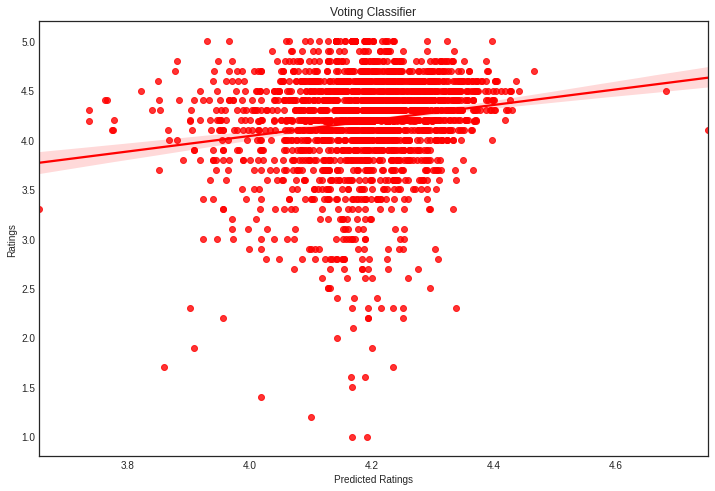

In [ ]:
reg_plotting(y_test, voting_reg_predict, 'Voting Classifier')